# Introduction to Spark

## Basic initialization

`SparkSession` is used to connect to the Spark Cluster.

In [191]:
from pyspark.sql import SparkSession

We will use Pandas to operate on the reduced data in the *driver program*.

In [192]:
import pandas as pd

Numpy will be always useful.

In [193]:
import numpy as np

Create a new session (or reuse an existing one).

In [194]:
spark = SparkSession.builder.getOrCreate()

In [195]:
spark

We can see that the session is established.

## Creating Spark Data Frames from Pandas

We can list the tables in our Spark Session, currently empty.

In [196]:
print(spark.catalog.listTables())

[Table(name='airports', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='countries', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='temp', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


We can create a Pandas `DataFrame` with random values.

In [197]:
pd_temp = pd.DataFrame(np.random.random(100))

We can see on the plot that it is really random:

In [198]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [199]:
pd_temp.plot()

Now we can convert it into Spark DataFrame:

In [200]:
spark_temp = spark.createDataFrame(pd_temp)

`createOrReplaceTempView` creates (or replaces if that view name already exists) a lazily evaluated "view" that you can then use like a table in Spark SQL. 

It does not persist to memory unless you cache (persist) the dataset that underpins the view.

In [201]:
spark_temp.createOrReplaceTempView("temp")

The created view is `TEMPORARY` which means it is not persistent.

In [202]:
print(spark.catalog.listTables())

[Table(name='airports', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='countries', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='temp', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


In [203]:
spark_temp.show()

+-------------------+
|                  0|
+-------------------+
| 0.5598159622791349|
|  0.692581151690837|
| 0.5566890799700385|
|0.21320317348979967|
| 0.9533064740563738|
| 0.9515109966664301|
|0.08971302159506889|
|  0.918730490544433|
| 0.9863597143334963|
| 0.9309464183408591|
|0.45982479145371546|
| 0.8412565089823657|
|0.22967249824400982|
| 0.5745940979467912|
|0.43512869450388314|
| 0.7313710327794464|
| 0.8748768406110943|
| 0.8378203990704497|
|0.17154499120646216|
| 0.5025281363634896|
+-------------------+
only showing top 20 rows



We can now use transformations on this DataFrame. The transformations are translated (compiled) to RDD transformations.

In [204]:
from pyspark.sql.functions import col, asc

In [205]:
spark_temp.filter((col('0') > 0.9)).show()

+------------------+
|                 0|
+------------------+
|0.9533064740563738|
|0.9515109966664301|
| 0.918730490544433|
|0.9863597143334963|
|0.9309464183408591|
|0.9776064556660955|
|0.9027173675223089|
|0.9447483276871228|
|0.9388582279932038|
|0.9305454585898081|
| 0.905766797206726|
|0.9745006987100845|
|0.9525529214372624|
|0.9615659384986127|
+------------------+



## Creating Spark Data Frames from input files

In [206]:
file_path = "airports.csv"

# Read in the airports data
airports = spark.read.csv(file_path,header=True)

# Show the data
print(airports.show())

+---+--------------------+------------------+----------------+---+----+------------------+-------------------+----+---+---+--------------------+-------+-----------+
|  1|      Goroka Airport|            Goroka|Papua New Guinea|GKA|AYGA|-6.081689834590001|      145.391998291|5282| 10|  U|Pacific/Port_Moresby|airport|OurAirports|
+---+--------------------+------------------+----------------+---+----+------------------+-------------------+----+---+---+--------------------+-------+-----------+
|  2|      Madang Airport|            Madang|Papua New Guinea|MAG|AYMD|    -5.20707988739|      145.789001465|  20| 10|  U|Pacific/Port_Moresby|airport|OurAirports|
|  3|Mount Hagen Kagam...|       Mount Hagen|Papua New Guinea|HGU|AYMH|-5.826789855957031| 144.29600524902344|5388| 10|  U|Pacific/Port_Moresby|airport|OurAirports|
|  4|      Nadzab Airport|            Nadzab|Papua New Guinea|LAE|AYNZ|         -6.569803|         146.725977| 239| 10|  U|Pacific/Port_Moresby|airport|OurAirports|
|  5|Port 

It may be useful to convert them to Pandas for quick browsing. 

**Warning!** This is not efficient for large datasets, as it requires performing actions on the dataset.

In [207]:
airports.toPandas()

1                               Goroka Airport        Goroka  \
0         2                               Madang Airport        Madang   
1         3                 Mount Hagen Kagamuga Airport   Mount Hagen   
2         4                               Nadzab Airport        Nadzab   
3         5  Port Moresby Jacksons International Airport  Port Moresby   
4         6                  Wewak International Airport         Wewak   
...     ...                                          ...           ...   
7178  12053                               Rugao Air Base         Rugao   
7179  12054                                Wuhu Air Base          Wuhu   
7180  12055                             Shanshan Airport      Shanshan   
7181  12056                        Yingkou Lanqi Airport       Yingkou   
7182  12057                      Shenyang Dongta Airport      Shenyang   

      Papua New Guinea  GKA  AYGA  -6.081689834590001       145.391998291  \
0     Papua New Guinea  MAG  AYMD      -5.20707988739       145.789001465   
1     Papua New Guinea  HGU  AYMH  -5.826789855957031  144.29600524902344   
2     Papua New Guinea  LAE  AYNZ           -6.569803          146.725977   
3     Papua New Guinea  POM  AYPY  -9.443380355834961  147.22000122070312   
4     Papua New Guinea  WWK  AYWK      -3.58383011818       143.669006348   
...                ...  ...   ...                 ...                 ...   
7178             China  RUG  ZSRG   32.25788497924805  120.50165557861328   
7179             China  WHU  ZSWU             31.3906          118.408997   
7180             China  SXJ  ZWSS   42.91170120239258   90.24749755859375   
7181             China  YKH  ZYYK           40.542524            122.3586   
7182             China   \N  ZYYY  41.784400939941406  123.49600219726562   

      5282  10   U  Pacific/Port_Moresby  airport  OurAirports  
0       20  10   U  Pacific/Port_Moresby  airport  OurAirports  
1     5388  10   U  Pacific/Port_Moresby  airport  OurAirports  
2      239  10   U  Pacific/Port_Moresby  airport  OurAirports  
3      146  10   U  Pacific/Port_Moresby  airport  OurAirports  
4       19  10   U  Pacific/Port_Moresby  airport  OurAirports  
...    ...  ..  ..                   ...      ...          ...  
7178     0  \N  \N                    \N  airport  OurAirports  
7179     0  \N  \N                    \N  airport  OurAirports  
7180     0  \N  \N                    \N  airport  OurAirports  
7181     0  \N  \N                    \N  airport  OurAirports  
7182     0  \N  \N                    \N  airport  OurAirports  

[7183 rows x 14 columns]

### Running SQL queries on dataframes

In [208]:
airports.createOrReplaceTempView("airports")

In [209]:
# Get the first 10 rows of flights
query = "FROM airports SELECT * LIMIT 10"

airports10 = spark.sql(query)

# Show the results
airports10.show()

+---+--------------------+------------+----------------+---+----+------------------+------------------+----+---+---+--------------------+-------+-----------+
|  1|      Goroka Airport|      Goroka|Papua New Guinea|GKA|AYGA|-6.081689834590001|     145.391998291|5282| 10|  U|Pacific/Port_Moresby|airport|OurAirports|
+---+--------------------+------------+----------------+---+----+------------------+------------------+----+---+---+--------------------+-------+-----------+
|  2|      Madang Airport|      Madang|Papua New Guinea|MAG|AYMD|    -5.20707988739|     145.789001465|  20| 10|  U|Pacific/Port_Moresby|airport|OurAirports|
|  3|Mount Hagen Kagam...| Mount Hagen|Papua New Guinea|HGU|AYMH|-5.826789855957031|144.29600524902344|5388| 10|  U|Pacific/Port_Moresby|airport|OurAirports|
|  4|      Nadzab Airport|      Nadzab|Papua New Guinea|LAE|AYNZ|         -6.569803|        146.725977| 239| 10|  U|Pacific/Port_Moresby|airport|OurAirports|
|  5|Port Moresby Jack...|Port Moresby|Papua New Gui

### More complex examples 

Read data from CSV file:
 * `inferSchema` - to detect which columns are numbers (not strigs!) - useful e.g. for sorting.
 * `header` - to read the firs line as column names

In [210]:
countries = spark.read.csv("countries of the world.csv",inferSchema=True,header=True)

In [211]:
countries.toPandas()

Country                               Region  Population  \
0       Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1           Albania   EASTERN EUROPE                          3581655   
2           Algeria   NORTHERN AFRICA                        32930091   
3    American Samoa   OCEANIA                                   57794   
4           Andorra   WESTERN EUROPE                            71201   
..               ...                                  ...         ...   
222       West Bank   NEAR EAST                               2460492   
223  Western Sahara   NORTHERN AFRICA                          273008   
224           Yemen   NEAR EAST                              21456188   
225          Zambia   SUB-SAHARAN AFRICA                     11502010   
226        Zimbabwe   SUB-SAHARAN AFRICA                     12236805   

     Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0            647500                       48,0                         0,00   
1             28748                      124,6                         1,26   
2           2381740                       13,8                         0,04   
3               199                      290,4                        58,29   
4               468                      152,1                         0,00   
..              ...                        ...                          ...   
222            5860                      419,9                         0,00   
223          266000                        1,0                         0,42   
224          527970                       40,6                         0,36   
225          752614                       15,3                         0,00   
226          390580                       31,3                         0,00   

    Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0           23,06                             163,07               700.0   
1           -4,93                              21,52              4500.0   
2           -0,39                                 31              6000.0   
3          -20,71                               9,27              8000.0   
4             6,6                               4,05             19000.0   
..            ...                                ...                 ...   
222          2,98                              19,62               800.0   
223          None                               None                 NaN   
224             0                               61,5               800.0   
225             0                              88,29               800.0   
226             0                              67,69              1900.0   

    Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%) Climate  \
0           36,0               3,2      12,13      0,22     87,65       1   
1           86,5              71,2      21,09      4,42     74,49       3   
2           70,0              78,1       3,22      0,25     96,53       1   
3           97,0             259,5         10        15        75       2   
4          100,0             497,2       2,22         0     97,78       3   
..           ...               ...        ...       ...       ...     ...   
222         None             145,2       16,9     18,97     64,13       3   
223         None              None       0,02         0     99,98       1   
224         50,2              37,2       2,78      0,24     96,98       1   
225         80,6               8,2       7,08      0,03      92,9       2   
226         90,7              26,8       8,32      0,34     91,34       2   

    Birthrate Deathrate Agriculture Industry Service  
0        46,6     20,34        0,38     0,24    0,38  
1       15,11      5,22       0,232    0,188   0,579  
2       17,14      4,61       0,101      0,6   0,298  
3       22,46      3,27        None     None    None  
4        8,71      6,25        None     None    None  
..        ...      

We can inspect the schema of the DataFrame.

In [212]:
countries.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Population: integer (nullable = true)
 |-- Area (sq. mi.): integer (nullable = true)
 |-- Pop. Density (per sq. mi.): string (nullable = true)
 |-- Coastline (coast/area ratio): string (nullable = true)
 |-- Net migration: string (nullable = true)
 |-- Infant mortality (per 1000 births): string (nullable = true)
 |-- GDP ($ per capita): integer (nullable = true)
 |-- Literacy (%): string (nullable = true)
 |-- Phones (per 1000): string (nullable = true)
 |-- Arable (%): string (nullable = true)
 |-- Crops (%): string (nullable = true)
 |-- Other (%): string (nullable = true)
 |-- Climate: string (nullable = true)
 |-- Birthrate: string (nullable = true)
 |-- Deathrate: string (nullable = true)
 |-- Agriculture: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Service: string (nullable = true)



### Examples of SQL Queries

In [213]:
countries.createOrReplaceTempView("countries")

In [214]:
spark.sql("SELECT * FROM countries WHERE Region LIKE '%OCEANIA%'").toPandas()

Country                               Region  Population  \
0         American Samoa   OCEANIA                                   57794   
1              Australia   OCEANIA                                20264082   
2           Cook Islands   OCEANIA                                   21388   
3                   Fiji   OCEANIA                                  905949   
4       French Polynesia   OCEANIA                                  274578   
5                   Guam   OCEANIA                                  171019   
6               Kiribati   OCEANIA                                  105432   
7       Marshall Islands   OCEANIA                                   60422   
8   Micronesia, Fed. St.   OCEANIA                                  108004   
9                  Nauru   OCEANIA                                   13287   
10         New Caledonia   OCEANIA                                  219246   
11           New Zealand   OCEANIA                                 4076140   
12    N. Mariana Islands   OCEANIA                                   82459   
13                 Palau   OCEANIA                                   20579   
14      Papua New Guinea   OCEANIA                                 5670544   
15                 Samoa   OCEANIA                                  176908   
16       Solomon Islands   OCEANIA                                  552438   
17                 Tonga   OCEANIA                                  114689   
18                Tuvalu   OCEANIA                                   11810   
19               Vanuatu   OCEANIA                                  208869   
20     Wallis and Futuna   OCEANIA                                   16025   

    Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0              199                      290,4                        58,29   
1          7686850                        2,6                         0,34   
2              240                       89,1                        50,00   
3            18270                       49,6                         6,18   
4             4167                       65,9                        60,60   
5              541                      316,1                        23,20   
6              811                      130,0                       140,94   
7            11854                        5,1                         3,12   
8              702                      153,9                       870,66   
9               21                      632,7                       142,86   
10           19060                       11,5                        11,83   
11          268680                       15,2                         5,63   
12             477                      172,9                       310,69   
13             458                       44,9                       331,66   
14          462840                       12,3                         1,11   
15            2944                       60,1                        13,69   
16           28450                       19,4                        18,67   
17             748                      153,3                        56,02   
18              26                      454,2                        92,31   
19           12200                       17,1                        20,72   
20             274                       58,5                        47,08   

   Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         -20,71                               9,27                8000   
1           3,98                               4,69               29000   
2           None                               None                5000   
3          -3,14                              12,62                5800   
4           2,94                               8,44               17500   
5              0                               6,94               21000   
6              0                              48,52        

### Queries using PySpark DSL

DSL = Domain Specific Language - API similar to natural or other language, implemented as library in another language.

List all the countries with the population > 38 million

In [215]:
countries.filter((col("Population") > 38000000)).orderBy("Population").toPandas()

Country                               Region  Population  \
0             Poland   EASTERN EUROPE                         38536869   
1          Argentina               LATIN AMER. & CARIB        39921833   
2              Spain   WESTERN EUROPE                         40397842   
3              Sudan   SUB-SAHARAN AFRICA                     41236378   
4           Colombia               LATIN AMER. & CARIB        43593035   
5       South Africa   SUB-SAHARAN AFRICA                     44187637   
6            Ukraine                  C.W. OF IND. STATES     46710816   
7              Burma         ASIA (EX. NEAR EAST)             47382633   
8       Korea, South         ASIA (EX. NEAR EAST)             48846823   
9              Italy   WESTERN EUROPE                         58133509   
10    United Kingdom   WESTERN EUROPE                         60609153   
11            France   WESTERN EUROPE                         60876136   
12  Congo, Dem. Rep.   SUB-SAHARAN AFRICA                     62660551   
13          Thailand         ASIA (EX. NEAR EAST)             64631595   
14              Iran         ASIA (EX. NEAR EAST)             68688433   
15            Turkey   NEAR EAST                              70413958   
16          Ethiopia   SUB-SAHARAN AFRICA                     74777981   
17             Egypt   NORTHERN AFRICA                        78887007   
18           Germany   WESTERN EUROPE                         82422299   
19           Vietnam         ASIA (EX. NEAR EAST)             84402966   
20       Philippines         ASIA (EX. NEAR EAST)             89468677   
21            Mexico               LATIN AMER. & CARIB       107449525   
22             Japan         ASIA (EX. NEAR EAST)            127463611   
23           Nigeria   SUB-SAHARAN AFRICA                    131859731   
24            Russia                  C.W. OF IND. STATES    142893540   
25        Bangladesh         ASIA (EX. NEAR EAST)            147365352   
26          Pakistan         ASIA (EX. NEAR EAST)            165803560   
27            Brazil               LATIN AMER. & CARIB       188078227   
28         Indonesia         ASIA (EX. NEAR EAST)            245452739   
29     United States   NORTHERN AMERICA                      298444215   
30             India         ASIA (EX. NEAR EAST)           1095351995   
31             China         ASIA (EX. NEAR EAST)           1313973713   

    Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0           312685                      123,3                         0,16   
1          2766890                       14,4                         0,18   
2           504782                       80,0                         0,98   
3          2505810                       16,5                         0,03   
4          1138910                       38,3                         0,28   
5          1219912                       36,2                         0,23   
6           603700                       77,4                         0,46   
7           678500                       69,8                         0,28   
8            98480                      496,0                         2,45   
9           301230                      193,0                         2,52   
10          244820                      247,6                         5,08   
11          547030                      111,3                         0,63   
12         2345410                       26,7                         0,00   
13          514000                      125,7                         0,63   
14         1648000                       41,7                         0,15   
15          780580                       90,2                         0,92   
16         1127127                       66,3                         0,00   
17         1001450                       78,8                         0,24   
18          357021                      230,9                         0,67   
19         

Select all the countries from Europe

In [216]:
countries.select("Country", "Population").where(col("Region").like("%EUROPE%")).show()

+--------------------+----------+
|             Country|Population|
+--------------------+----------+
|            Albania |   3581655|
|            Andorra |     71201|
|            Austria |   8192880|
|            Belgium |  10379067|
|Bosnia & Herzegov...|   4498976|
|           Bulgaria |   7385367|
|            Croatia |   4494749|
|     Czech Republic |  10235455|
|            Denmark |   5450661|
|      Faroe Islands |     47246|
|            Finland |   5231372|
|             France |  60876136|
|            Germany |  82422299|
|          Gibraltar |     27928|
|             Greece |  10688058|
|           Guernsey |     65409|
|            Hungary |   9981334|
|            Iceland |    299388|
|            Ireland |   4062235|
|        Isle of Man |     75441|
+--------------------+----------+
only showing top 20 rows



Conditions in `where` clause can contain logical expressions.

In [217]:
countries.select("Country", "Population")\
.where((col("Region").like("%EUROPE%")) & (col("Population")> 10000000)).show()

+---------------+----------+
|        Country|Population|
+---------------+----------+
|       Belgium |  10379067|
|Czech Republic |  10235455|
|        France |  60876136|
|       Germany |  82422299|
|        Greece |  10688058|
|         Italy |  58133509|
|   Netherlands |  16491461|
|        Poland |  38536869|
|      Portugal |  10605870|
|       Romania |  22303552|
|         Spain |  40397842|
|United Kingdom |  60609153|
+---------------+----------+



### Aggregation

We can run aggregations with predefined functions (faster!):

In [218]:
from pyspark.sql.functions import sum

In [219]:
pd_countries = countries.select("Region", "Population").groupBy("Region").agg(sum("Population")).toPandas()

In [220]:
pd_countries

Region  sum(Population)
0   BALTICS                                      7184974
1                  C.W. OF IND. STATES         280081548
2         ASIA (EX. NEAR EAST)                3687982236
3   WESTERN EUROPE                             396339998
4   NORTHERN AMERICA                           331672307
5   NEAR EAST                                  195068377
6   EASTERN EUROPE                             119914717
7   OCEANIA                                     33131662
8   SUB-SAHARAN AFRICA                         749437000
9   NORTHERN AFRICA                            161407133
10              LATIN AMER. & CARIB            561824599

We can make the column name look better, by using `alias`:

In [221]:
pd_countries = countries.select("Region", "Population").groupBy("Region").agg(sum("Population").alias('Total')).toPandas()

In [222]:
pd_countries

Region       Total
0   BALTICS                                 7184974
1                  C.W. OF IND. STATES    280081548
2         ASIA (EX. NEAR EAST)           3687982236
3   WESTERN EUROPE                        396339998
4   NORTHERN AMERICA                      331672307
5   NEAR EAST                             195068377
6   EASTERN EUROPE                        119914717
7   OCEANIA                                33131662
8   SUB-SAHARAN AFRICA                    749437000
9   NORTHERN AFRICA                       161407133
10              LATIN AMER. & CARIB       561824599

### Plot examples 
Pandas DataFrames are useful for plotting using MatPlotLib:

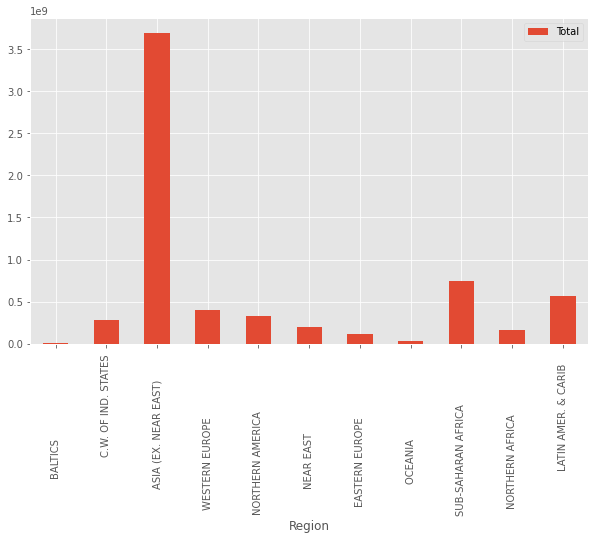

In [223]:
pd_countries.plot(x='Region', y='Total',kind='bar', figsize=(10, 6))

## User defined functions for data manipulation
Our `countries` DataFrame has some problems:
 * missing values
 * some numbers use comma instead of point as floating point separator (e.g. Literacy  = 99,4)
 
We can clean the data using User Defined Functions (UDF)

In [224]:
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf

Define a Python function which coverts numbers with commas to `float`

In [225]:
def to_float (s) :
   return float(s.replace(',','.'))

Test that it works:

In [226]:
to_float('0,99')

0.99

Now define a Spark UDF:

In [227]:
float_udf = udf(to_float , FloatType())

Test it on a Data Frame

In [228]:
countries.withColumn("Literacy", float_udf("Literacy (%)"))

DataFrame[Country: string, Region: string, Population: int, Area (sq. mi.): int, Pop. Density (per sq. mi.): string, Coastline (coast/area ratio): string, Net migration: string, Infant mortality (per 1000 births): string, GDP ($ per capita): int, Literacy (%): string, Phones (per 1000): string, Arable (%): string, Crops (%): string, Other (%): string, Climate: string, Birthrate: string, Deathrate: string, Agriculture: string, Industry: string, Service: string, Literacy: float]

OK, we can see that the `Literacy` is now `float`

In [229]:
countries.show(50)

+--------------------+--------------------+----------+--------------+--------------------------+----------------------------+-------------+----------------------------------+------------------+------------+-----------------+----------+---------+---------+-------+---------+---------+-----------+--------+-------+
|             Country|              Region|Population|Area (sq. mi.)|Pop. Density (per sq. mi.)|Coastline (coast/area ratio)|Net migration|Infant mortality (per 1000 births)|GDP ($ per capita)|Literacy (%)|Phones (per 1000)|Arable (%)|Crops (%)|Other (%)|Climate|Birthrate|Deathrate|Agriculture|Industry|Service|
+--------------------+--------------------+----------+--------------+--------------------------+----------------------------+-------------+----------------------------------+------------------+------------+-----------------+----------+---------+---------+-------+---------+---------+-----------+--------+-------+
|        Afghanistan |ASIA (EX. NEAR EA...|  31056997|       

In [230]:
# countries.where((col("Literacy") < 50) & (col("GDP ($ per capita)") > 700)).show()

Oops, what does it mean???

- some rows have empty values!

Before we can use the table, we need to remove empty rows. Otherwise our UDF will fail.

In [231]:
full_countries = countries.select('Country', 'Population', 'Literacy (%)', 'GDP ($ per capita)').na.drop()

We can now apply the new UDF to the Data Frame:

In [232]:
full_countries = full_countries.withColumn("Literacy", float_udf("Literacy (%)"))

In [233]:
full_countries.show(50)

+--------------------+----------+------------+------------------+--------+
|             Country|Population|Literacy (%)|GDP ($ per capita)|Literacy|
+--------------------+----------+------------+------------------+--------+
|        Afghanistan |  31056997|        36,0|               700|    36.0|
|            Albania |   3581655|        86,5|              4500|    86.5|
|            Algeria |  32930091|        70,0|              6000|    70.0|
|     American Samoa |     57794|        97,0|              8000|    97.0|
|            Andorra |     71201|       100,0|             19000|   100.0|
|             Angola |  12127071|        42,0|              1900|    42.0|
|           Anguilla |     13477|        95,0|              8600|    95.0|
|  Antigua & Barbuda |     69108|        89,0|             11000|    89.0|
|          Argentina |  39921833|        97,1|             11200|    97.1|
|            Armenia |   2976372|        98,6|              3500|    98.6|
|              Aruba |   

In [234]:
full_countries.where((col("Literacy") < 50) & (col("GDP ($ per capita)") > 700)).show()

+--------------+----------+------------+------------------+--------+
|       Country|Population|Literacy (%)|GDP ($ per capita)|Literacy|
+--------------+----------+------------+------------------+--------+
|       Angola |  12127071|        42,0|              1900|    42.0|
|   Bangladesh | 147365352|        43,1|              1900|    43.1|
|        Benin |   7862944|        40,9|              1100|    40.9|
|       Bhutan |   2279723|        42,2|              1300|    42.2|
| Burkina Faso |  13902972|        26,6|              1100|    26.6|
|         Chad |   9944201|        47,5|              1200|    47.5|
|  Gambia, The |   1641564|        40,1|              1700|    40.1|
|       Guinea |   9690222|        35,9|              2100|    35.9|
|Guinea-Bissau |   1442029|        42,4|               800|    42.4|
|         Iraq |  26783383|        40,4|              1500|    40.4|
|         Mali |  11716829|        46,4|               900|    46.4|
|   Mauritania |   3177388|       

In [235]:
full_countries.toPandas().plot(x="Literacy",y="GDP ($ per capita)",kind="scatter",figsize=(10, 6))

# Useful information

 * https://spark.apache.org/docs/latest/quick-start.html
 * https://spark.apache.org/docs/latest/sql-programming-guide.html
 * https://pandas.pydata.org/pandas-docs/stable/visualization.html

# Task 1
Narysuj wykres zależności kolumn Birthrate i Deathrate w zależności od GDP per capita dla 30 najbogatszych (zależnośc Birthrate od GDP oraz Deathrate od GDP na jednym wykresie róznymi kolorami) i 30 najbiedniejszych krajów (podobnie)

In [236]:
countries.toPandas()

Country                               Region  Population  \
0       Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1           Albania   EASTERN EUROPE                          3581655   
2           Algeria   NORTHERN AFRICA                        32930091   
3    American Samoa   OCEANIA                                   57794   
4           Andorra   WESTERN EUROPE                            71201   
..               ...                                  ...         ...   
222       West Bank   NEAR EAST                               2460492   
223  Western Sahara   NORTHERN AFRICA                          273008   
224           Yemen   NEAR EAST                              21456188   
225          Zambia   SUB-SAHARAN AFRICA                     11502010   
226        Zimbabwe   SUB-SAHARAN AFRICA                     12236805   

     Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0            647500                       48,0                         0,00   
1             28748                      124,6                         1,26   
2           2381740                       13,8                         0,04   
3               199                      290,4                        58,29   
4               468                      152,1                         0,00   
..              ...                        ...                          ...   
222            5860                      419,9                         0,00   
223          266000                        1,0                         0,42   
224          527970                       40,6                         0,36   
225          752614                       15,3                         0,00   
226          390580                       31,3                         0,00   

    Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0           23,06                             163,07               700.0   
1           -4,93                              21,52              4500.0   
2           -0,39                                 31              6000.0   
3          -20,71                               9,27              8000.0   
4             6,6                               4,05             19000.0   
..            ...                                ...                 ...   
222          2,98                              19,62               800.0   
223          None                               None                 NaN   
224             0                               61,5               800.0   
225             0                              88,29               800.0   
226             0                              67,69              1900.0   

    Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%) Climate  \
0           36,0               3,2      12,13      0,22     87,65       1   
1           86,5              71,2      21,09      4,42     74,49       3   
2           70,0              78,1       3,22      0,25     96,53       1   
3           97,0             259,5         10        15        75       2   
4          100,0             497,2       2,22         0     97,78       3   
..           ...               ...        ...       ...       ...     ...   
222         None             145,2       16,9     18,97     64,13       3   
223         None              None       0,02         0     99,98       1   
224         50,2              37,2       2,78      0,24     96,98       1   
225         80,6               8,2       7,08      0,03      92,9       2   
226         90,7              26,8       8,32      0,34     91,34       2   

    Birthrate Deathrate Agriculture Industry Service  
0        46,6     20,34        0,38     0,24    0,38  
1       15,11      5,22       0,232    0,188   0,579  
2       17,14      4,61       0,101      0,6   0,298  
3       22,46      3,27        None     None    None  
4        8,71      6,25        None     None    None  
..        ...      

In [237]:
countries_plot = countries.select('Country', 'GDP ($ per capita)', 'Birthrate', 'Deathrate').na.drop()

## Top 30 richest countries

In [238]:
top_30 = countries_plot.withColumn("Birthrate", float_udf("Birthrate"))\
                                .withColumn("Deathrate", float_udf("Deathrate"))\
                                .withColumn("GDP ($ per capita)", col("GDP ($ per capita)").cast("float"))\
                                .orderBy("GDP ($ per capita)", ascending=False)\
                                .limit(30)

In [239]:
top_30_df = top_30.toPandas()

In [240]:
top_30_df.head(5)

Country  GDP ($ per capita)  Birthrate  Deathrate
0      Luxembourg              55100.0      11.94       8.41
1          Norway              37800.0      11.46       9.40
2   United States              37800.0      14.14       8.26
3         Bermuda              36000.0      11.40       7.74
4  Cayman Islands              35000.0      12.74       4.89

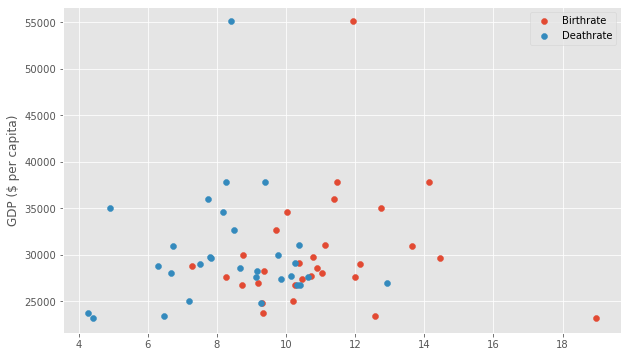

In [317]:
plt.figure(figsize=(10, 6))
plt.scatter(top_30_df['Birthrate'], top_30_df['GDP ($ per capita)'], label='Birthrate')
plt.scatter(top_30_df['Deathrate'], top_30_df['GDP ($ per capita)'], label='Deathrate')
plt.ylabel('GDP ($ per capita)')
plt.legend()
plt.show()

The richest countries often are characterised by similar level of Birthrate and Deathrate.

## Bottom 30 - 30 poorest countries

In [242]:
bot_30 = countries_plot.withColumn("Birthrate", float_udf("Birthrate"))\
                                .withColumn("Deathrate", float_udf("Deathrate"))\
                                .withColumn("GDP ($ per capita)", col("GDP ($ per capita)").cast("float"))\
                                .orderBy("GDP ($ per capita)", ascending=True)\
                                .limit(30)

In [316]:
bot_30_df = bot_30.toPandas()
plt.figure(figsize=(10, 6))
plt.scatter(bot_30_df['Birthrate'], bot_30_df['GDP ($ per capita)'], label='Birthrate')
plt.scatter(bot_30_df['Deathrate'], bot_30_df['GDP ($ per capita)'], label='Deathrate')
plt.ylabel('GDP ($ per capita)')
plt.legend()
plt.show()

The poorest countries are characterised by greater Birthrate than Deathrate.

# Task 2
Wczytaj zbiór danych "airports.csv" ze strony https://www.kaggle.com/jonatancr/airports (zawiera on dane na temat lotnisk z całego świata). Ponieważ w zbiorze tym nie ma nagłówka, nadaj własne nazwy kolumnom, korzystając z opisu pliku na  tej stronie. Narysuj na wykresie (mapie) położenia wszystkich/wybranych lotnisk.

### Read and rename

In [244]:
airports = spark.read.csv("airports.csv",header=False)
airports.toPandas().head(2)

_c0             _c1     _c2               _c3  _c4   _c5  \
0   1  Goroka Airport  Goroka  Papua New Guinea  GKA  AYGA   
1   2  Madang Airport  Madang  Papua New Guinea  MAG  AYMD   

                  _c6            _c7   _c8 _c9 _c10                  _c11  \
0  -6.081689834590001  145.391998291  5282  10    U  Pacific/Port_Moresby   
1      -5.20707988739  145.789001465    20  10    U  Pacific/Port_Moresby   

      _c12         _c13  
0  airport  OurAirports  
1  airport  OurAirports

In [245]:
airports = airports.toDF("AirportID", "Name", "City", "Country", "IATA", "ICAO", "Latitude", 
                         "Longitude", "Altitude", "Timezone", "DST", " Timezone", "Type", "Source")
airports.toPandas().head(2)

AirportID            Name    City           Country IATA  ICAO  \
0         1  Goroka Airport  Goroka  Papua New Guinea  GKA  AYGA   
1         2  Madang Airport  Madang  Papua New Guinea  MAG  AYMD   

             Latitude      Longitude Altitude Timezone DST  \
0  -6.081689834590001  145.391998291     5282       10   U   
1      -5.20707988739  145.789001465       20       10   U   

               Timezone     Type       Source  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports

### Select data and plot

In [246]:
air_points_pd = airports.select("Name", "Latitude", "Longitude").toPandas()
air_points_pd.head(3)

Name            Latitude           Longitude
0                Goroka Airport  -6.081689834590001       145.391998291
1                Madang Airport      -5.20707988739       145.789001465
2  Mount Hagen Kagamuga Airport  -5.826789855957031  144.29600524902344

In [247]:
import folium
m = folium.Map()
for p in range(0, len(air_points_pd)):
    folium.Marker((air_points_pd.iloc[p, 1], air_points_pd.iloc[p, 2]), popup=air_points_pd['Name'][p]).add_to(m)
m

# Task 3
Znajdź 10 krajów w których najniżej położone lotnisko ma najwyższą wysokość, podając wyniki w m. n. p. m.

In [248]:
airports.toPandas().head(2)

AirportID            Name    City           Country IATA  ICAO  \
0         1  Goroka Airport  Goroka  Papua New Guinea  GKA  AYGA   
1         2  Madang Airport  Madang  Papua New Guinea  MAG  AYMD   

             Latitude      Longitude Altitude Timezone DST  \
0  -6.081689834590001  145.391998291     5282       10   U   
1      -5.20707988739  145.789001465       20       10   U   

               Timezone     Type       Source  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports

In [249]:
airports = airports.withColumn("Altitude", col("Altitude").cast(FloatType()))

In [250]:
from pyspark.sql import functions as F

low = airports.groupBy("Country")\
                            .agg(F.first("Name").alias("Name"), F.min("Altitude").alias("Altitude"))
low.toPandas()

Country                                     Name  \
0                              Chad                           Abeche Airport   
1                          Anguilla                        Wallblake Airport   
2                          Paraguay  Silvio Pettirossi International Airport   
3                            Russia                          Yakutsk Airport   
4    British Indian Ocean Territory      Diego Garcia Naval Support Facility   
..                              ...                                      ...   
232                         Moldova              Balti International Airport   
233                  United Kingdom            Belfast International Airport   
234                         Vietnam            Da Nang International Airport   
235                            Mali                            Senou Airport   
236                     Netherlands               Amsterdam Airport Schiphol   

     Altitude  
0       771.0  
1       127.0  
2       223.0  
3       -65.0  
4         9.0  
..        ...  
232     141.0  
233       0.0  
234       6.0  
235     164.0  
236     -15.0  

[237 rows x 3 columns]

In [251]:
top = low.orderBy("Altitude", ascending=False)

### Cast feets to meters

In [252]:
top = top.withColumn("Altitude [m]", col("Altitude") * 0.3048)\
        .limit(10)
top.toPandas()

Country                                Name  Altitude  Altitude [m]
0      Lesotho  Moshoeshoe I International Airport    5105.0     1556.0040
1       Rwanda                     Gisenyi Airport    4859.0     1481.0232
2      Burundi     Bujumbura International Airport    2582.0      786.9936
3    West Bank                   Jerusalem Airport    2485.0      757.4280
4       Uganda       Entebbe International Airport    2472.0      753.4656
5    Swaziland                    Matsapha Airport    2075.0      632.4600
6   Kyrgyzstan         Manas International Airport    2058.0      627.2784
7     Botswana                 Francistown Airport    1772.0      540.1056
8       Malawi       Chileka International Airport    1580.0      481.5840
9  South Sudan          Juba International Airport    1513.0      461.1624

# Task 4
Na wykresie scatterplot narysuj zależność liczby lotnisk od powierzchni kraju.
 - Dane potrzebne do wykresu są w dwóch ramkach (Countries i Airports), konieczne więc będzie ich złączenie (join).
 - Nie zawsze nazwy tych samych krajów będą identyczne w obu ramkach, co może stanowić problem (złączenie nie powstanie). Zastanów się jak przy pomocy mechanizmu złączeń wykryć, które nazwy się różnią. Stwórz odpowiednią ramkę, która zawiera takie nazwy.

In [253]:
sorted(airports.toPandas()['Country'].unique())
airports = airports.orderBy('Country')
airports.toPandas().head(2)

AirportID               Name       City      Country IATA  ICAO  \
0      2048      Herat Airport      Herat  Afghanistan  HEA  OAHR   
1      2049  Jalalabad Airport  Jalalabad  Afghanistan  JAA  OAJL   

             Latitude          Longitude  Altitude Timezone DST    Timezone  \
0  34.209999084472656  62.22829818725586    3206.0      4.5   U  Asia/Kabul   
1   34.39979934692383  70.49859619140625    1814.0      4.5   U  Asia/Kabul   

      Type       Source  
0  airport  OurAirports  
1  airport  OurAirports

In [254]:
sorted(countries.toPandas()['Country'].unique())
countries = countries.orderBy('Country')
countries.toPandas().head(2)

Country                               Region  Population  \
0  Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1      Albania   EASTERN EUROPE                          3581655   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06                             163,07               700.0   
1         -4,93                              21,52              4500.0   

  Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%) Climate  \
0         36,0               3,2      12,13      0,22     87,65       1   
1         86,5              71,2      21,09      4,42     74,49       3   

  Birthrate Deathrate Agriculture Industry Service  
0      46,6     20,34        0,38     0,24    0,38  
1     15,11      5,22       0,232    0,188   0,579

### Remove white spaces

In [292]:
from pyspark.sql.functions import upper, count, isnull, trim

airports = airports.withColumn('Country', trim(airports['Country']))
countries = countries.withColumn('Country', trim(countries['Country']))

In [293]:
merged = airports.alias('a').join(countries.alias('c'), on=airports['Country'] == countries['Country'], how='left')

result = merged.groupBy('a.Country', 'c.`Area (sq. mi.)`').agg(count('a.AirportID').alias('Amount'))

result_sorted = result.orderBy(col('Amount').desc())

result_sorted.show()

+--------------+--------------+------+
|       Country|Area (sq. mi.)|Amount|
+--------------+--------------+------+
| United States|       9631420|  1435|
|        Canada|       9984670|   417|
|     Australia|       7686850|   296|
|       Germany|        357021|   241|
|        Russia|      17075200|   238|
|        Brazil|       8511965|   234|
|        France|        547030|   214|
|         China|       9596960|   180|
|United Kingdom|        244820|   162|
|         India|       3287590|   125|
|     Indonesia|       1919440|   125|
|         Japan|        377835|   119|
|  South Africa|       1219912|    96|
|     Argentina|       2766890|    94|
|        Mexico|       1972550|    83|
|         Italy|        301230|    82|
|          Iran|       1648000|    81|
|        Sweden|        449964|    77|
|      Colombia|       1138910|    74|
|        Turkey|        780580|    72|
+--------------+--------------+------+
only showing top 20 rows



### Not matched
Some of them are just part (islands) of another country like Anguilla (UK). Many of them had whitespaces, so I've removed them.

In [296]:
merged = airports.alias('a').join(
    countries.alias('c'), 
    on=col('a.Country') == col('c.Country'), 
    how='full_outer'
)

diff_countries = merged.filter(isnull(col('a.Country')) | isnull(col('c.Country')))

diff_countries.select('a.Country', 'c.Country').distinct().show(100)

+--------------------+--------------------+
|             Country|             Country|
+--------------------+--------------------+
|                null|Congo, Repub. of the|
|British Indian Oc...|                null|
|                null|        Korea, North|
|                null|    Congo, Dem. Rep.|
|      Norfolk Island|                null|
|Northern Mariana ...|                null|
|Turks and Caicos ...|                null|
|                null|Central African Rep.|
|British Virgin Is...|                null|
|                null|          San Marino|
|             Myanmar|                null|
|             Bahamas|                null|
|                null|Micronesia, Fed. St.|
|Sao Tome and Prin...|                null|
|                null|             Andorra|
|                null|  N. Mariana Islands|
|Saint Pierre and ...|                null|
|    Congo (Kinshasa)|                null|
|Central African R...|                null|
|                null|       Lie

In [297]:
result_sorted = result_sorted.toPandas()

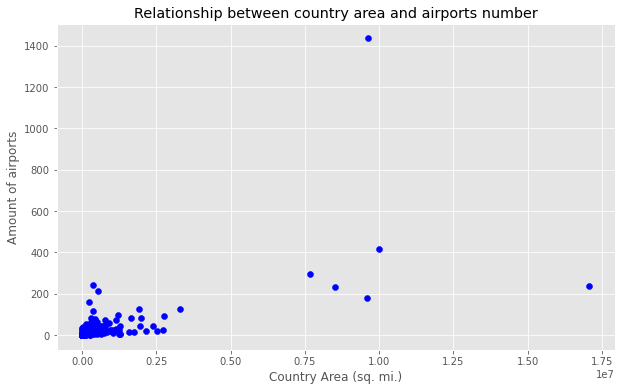

In [315]:
plt.figure(figsize=(10, 6))
plt.scatter(result_sorted['Area (sq. mi.)'], result_sorted['Amount'], c='blue')
plt.xlabel('Country Area (sq. mi.)')
plt.ylabel('Amount of airports')
plt.title('Relationship between country area and airports number')
plt.show()

# Task 5
Oblicz, ile lotnisk jest na poszczególnych kontynentach. To zadanie również wymaga złączenia ramek "Countries" i "Airports". Wynik przedstaw na wykresie kołowym.


In [320]:
merged = airports.alias('a').join(countries.alias('c'), on=airports['Country'] == countries['Country'], how='left')

result = merged.groupBy('c.Region').agg(count('a.AirportID').alias('Amount'))

result_sorted = result.orderBy(col('Amount').desc())

result_sorted.show()

+--------------------+------+
|              Region|Amount|
+--------------------+------+
|NORTHERN AMERICA ...|  1875|
|WESTERN EUROPE   ...|  1224|
|ASIA (EX. NEAR EA...|  1064|
|LATIN AMER. & CAR...|   921|
|OCEANIA          ...|   542|
|SUB-SAHARAN AFRIC...|   534|
|C.W. OF IND. STATES |   357|
|NEAR EAST        ...|   208|
|                null|   171|
|EASTERN EUROPE   ...|   143|
|NORTHERN AFRICA  ...|   121|
|BALTICS          ...|    24|
+--------------------+------+



In [321]:
result_sorted = result_sorted.toPandas()

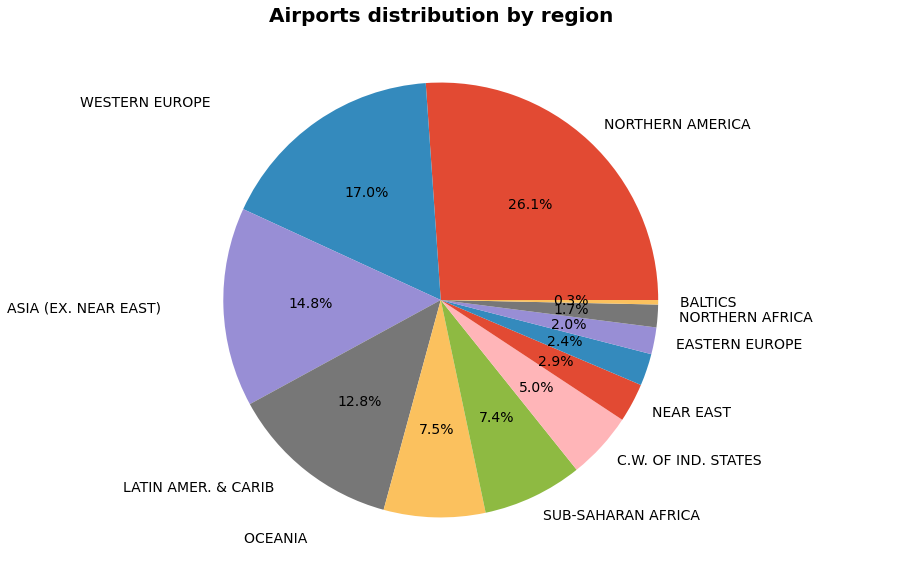

In [342]:
plt.figure(figsize=(10, 10))
plt.pie(result_sorted['Amount'], labels = result_sorted['Region'], autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Airports distribution by region', fontweight='bold', size=20)
plt.show()